In [1]:
#importing the required packages
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1280x960 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

# Read & Plot Time Series Data

# Read quaterly time series: portugal

In [2]:
PORT = pd.read_csv('PortugalPort.csv')
#Turnover.head()
#NO OF PASSENGER WHO USED THE PORT
PORT.head()

,Year,Quarter,Pax
0,2000,Q1,21
1,2000,Q2,61
2,2000,Q3,119
3,2000,Q4,30
4,2001,Q1,16


In [3]:
PORT.tail(5)

,Year,Quarter,Pax
67,2016,Q4,54
68,2017,Q1,29
69,2017,Q2,96
70,2017,Q3,152
71,2017,Q4,61


In [4]:
from datetime import datetime
date_rng4= pd.date_range(start='1/1/2000', end='31/12/2017', freq='Q')
date_rng4

DatetimeIndex(['2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31',
               '2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
      

In [5]:
PORT['TimeIndex'] = pd.DataFrame(date_rng4, columns=['Quarter'])
PORT.head()

,Year,Quarter,Pax,TimeIndex
0,2000,Q1,21,2000-03-31
1,2000,Q2,61,2000-06-30
2,2000,Q3,119,2000-09-30
3,2000,Q4,30,2000-12-31
4,2001,Q1,16,2001-03-31


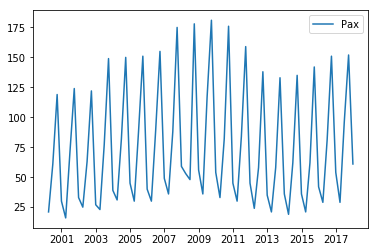

In [6]:
plt.plot(PORT.TimeIndex, PORT.Pax)
plt.legend(loc='best')
pyplot.show()

In [7]:
#NOW WE CAN HAVE MORE DATA WHICH OBSERVATION HAS THAT PEAKS INSTEAD OF ONE OBSERVATION
#INCLUDING THE YEAR WE HAVE THE QUARTERS OF THE DATA AVAILABLE
#overall it is constant every year except for some years the passengers are slightly increasing
#every year first two or three quarters increasing and remaining quarters decreasing

# Simple Forecasts: Average and Moving Average

In [8]:
pax_avg = PORT.copy()
pax_avg['avg_forecast'] = PORT['Pax'].mean()

In [9]:
PORT.head()

,Year,Quarter,Pax,TimeIndex
0,2000,Q1,21,2000-03-31
1,2000,Q2,61,2000-06-30
2,2000,Q3,119,2000-09-30
3,2000,Q4,30,2000-12-31
4,2001,Q1,16,2001-03-31


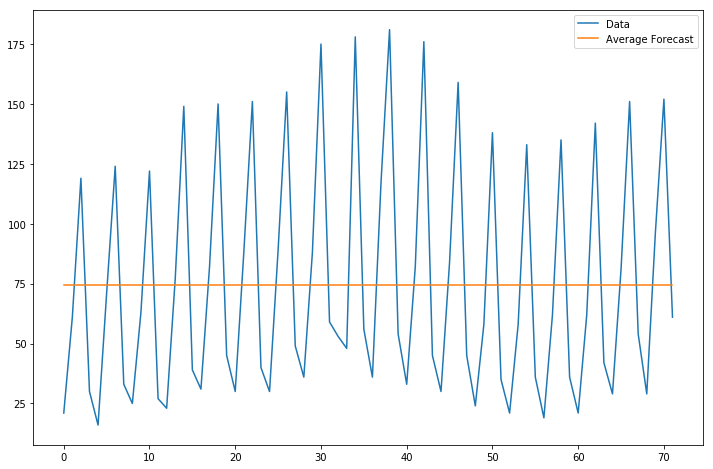

In [10]:
plt.figure(figsize=(12,8))
plt.plot(PORT['Pax'], label='Data')
plt.plot(pax_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

# moving average as it having the 4 quarters the moving average is calculated for 4 quarters



In [11]:
mvg_avg = PORT.copy()
mvg_avg['moving_avg_forecast'] = PORT['Pax'].rolling(4).mean()
mvg_avg.head(6)

,Year,Quarter,Pax,TimeIndex,moving_avg_forecast
0,2000,Q1,21,2000-03-31,NaN
1,2000,Q2,61,2000-06-30,NaN
2,2000,Q3,119,2000-09-30,NaN
3,2000,Q4,30,2000-12-31,57.75
4,2001,Q1,16,2001-03-31,56.50
5,2001,Q2,71,2001-06-30,59.00


In [12]:
mvg_avg.tail(6)

,Year,Quarter,Pax,TimeIndex,moving_avg_forecast
66,2016,Q3,151,2016-09-30,75.75
67,2016,Q4,54,2016-12-31,78.75
68,2017,Q1,29,2017-03-31,78.75
69,2017,Q2,96,2017-06-30,82.50
70,2017,Q3,152,2017-09-30,82.75
71,2017,Q4,61,2017-12-31,84.50


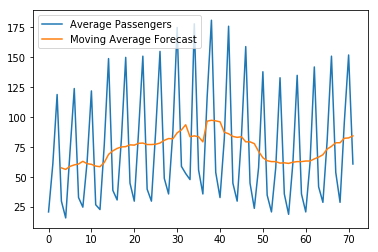

In [13]:
#plt.figure(figsize=(16,8))
plt.plot(PORT['Pax'], label='Average Passengers')
plt.plot(mvg_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

# Visualization of Seasonality: portugal port

In [14]:
quarterly_turnover = pd.pivot_table(PORT, values = "Pax", columns = "Quarter", index = "Year")
quarterly_turnover

Quarter,Q1,Q2,Q3,Q4
Year,,,,
2000,21,61,119,30
2001,16,71,124,33
2002,25,63,122,27
2003,23,77,149,39
2004,31,82,150,45
2005,30,88,151,40
2006,30,89,155,49
2007,36,88,175,59
2008,53,48,178,56


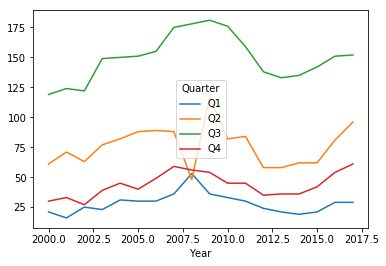

In [15]:
quarterly_turnover.plot()
#SUBSERIES FROM THE ORIGINAL SERIES

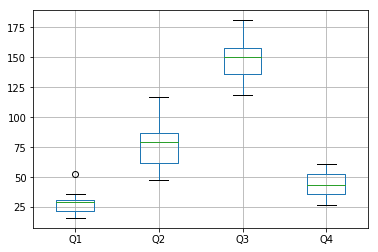

In [16]:
quarterly_turnover.boxplot()
plt.show()

# Seasonal Decomposition of quaterly portugal port additive

In [17]:
import statsmodels.api as sm

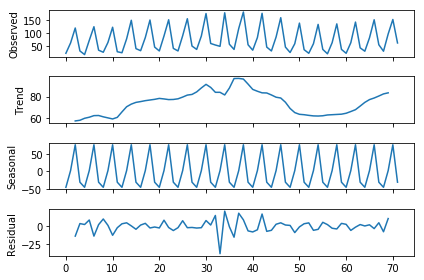

In [18]:
decompport = sm.tsa.seasonal_decompose(PORT.Pax, model="additive", freq=4)
decompport.plot()
plt.show()

In [19]:
trend = decompport.trend
seasonal = decompport.seasonal
residual = decompport.resid

In [20]:
trend.head()

0       NaN
1       NaN
2    57.125
3    57.750
4    59.625
Name: Pax, dtype: float64

In [21]:
trend.tail()

67    80.625
68    82.625
69    83.625
70       NaN
71       NaN
Name: Pax, dtype: float64

In [22]:
seasonal.head(4)

0   -45.961397
1     1.803309
2    75.560662
3   -31.402574
Name: Pax, dtype: float64

In [23]:
residual.head()

0          NaN
1          NaN
2   -13.685662
3     3.652574
4     2.336397
Name: Pax, dtype: float64

# Split Data in Training and Test of portugal quaterly


In [24]:
#Creating train and test set 
train=PORT[0:int(len(PORT)*0.7)] 
test=PORT[int(len(PORT)*0.7):]

In [25]:
train.tail()

,Year,Quarter,Pax,TimeIndex
45,2011,Q2,84,2011-06-30
46,2011,Q3,159,2011-09-30
47,2011,Q4,45,2011-12-31
48,2012,Q1,24,2012-03-31
49,2012,Q2,58,2012-06-30


In [26]:
test.head()

,Year,Quarter,Pax,TimeIndex
50,2012,Q3,138,2012-09-30
51,2012,Q4,35,2012-12-31
52,2013,Q1,21,2013-03-31
53,2013,Q2,58,2013-06-30
54,2013,Q3,133,2013-09-30


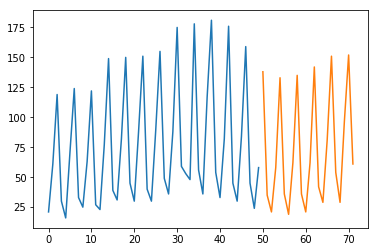

In [27]:
plt.plot(train.Pax)
plt.plot(test.Pax)
pyplot.show()

# Simple Exponential Smoothing of portugal when there is no trend and seasonality

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [29]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Pax']))

In [30]:
# fit model
model99_fit = model.fit(smoothing_level=0.99,optimized=False)
model5_fit = model.fit(smoothing_level=0.5,optimized=False)
#smoothing_level=ALPHA
model1_fit = model.fit(smoothing_level=0.1,optimized=False)

In [31]:
#forecasting
fcst_SES = test.copy()

In [32]:
#forecasting for different levels of smoothing level
fcst_SES['SES99'] = model99_fit.forecast(len(test['Pax']))
fcst_SES['SES5'] = model5_fit.forecast(len(test['Pax']))
fcst_SES['SES1'] = model1_fit.forecast(len(test['Pax']))

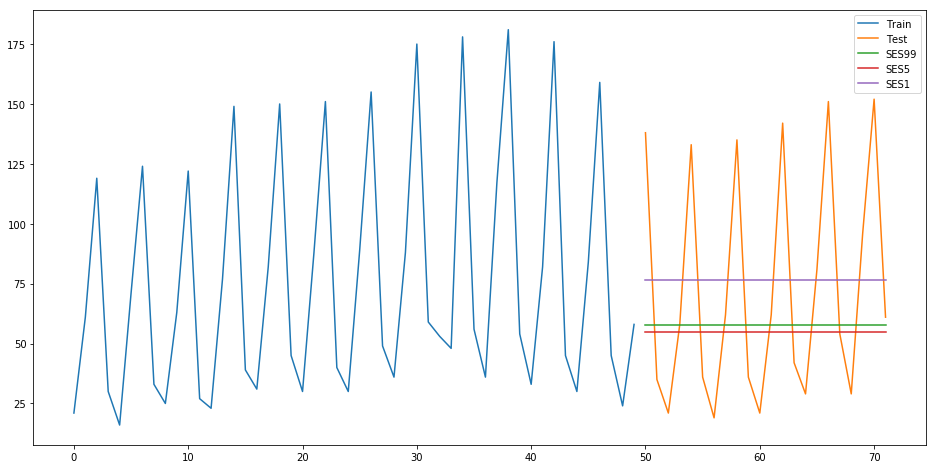

In [33]:
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(fcst_SES['SES99'], label='SES99')
plt.plot(fcst_SES['SES5'], label='SES5')
plt.plot(fcst_SES['SES1'], label='SES1')
plt.legend(loc='best')

In [35]:
fcst_SES['SES99'].head()

50    57.662213
51    57.662213
52    57.662213
53    57.662213
54    57.662213
Name: SES99, dtype: float64

In [36]:
#mape
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
mean_absolute_percentage_error(test['Pax'],fcst_SES['SES99'])

64.71363268103826

In [38]:
mean_absolute_percentage_error(test['Pax'],fcst_SES['SES1'])

92.45990342408331

In [39]:
mean_absolute_percentage_error(test['Pax'],fcst_SES['SES5'])

62.12635979260367

In [40]:
rmse = sqrt(mean_squared_error(test['Pax'],fcst_SES['SES99']))
rmse

48.820481451082

In [41]:
rmse = sqrt(mean_squared_error(test['Pax'],fcst_SES['SES1']))
rmse

46.725801183686784

In [42]:
rmse = sqrt(mean_squared_error(test['Pax'],fcst_SES['SES5']))
rmse

49.69647505764708

In [43]:
#optimum model
model_opt_fit = model.fit()

In [44]:
model_opt_fit.model.params   #optimum parameters #alpha=0.0

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 75.14001041081005,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Double Exponential (Holt) of portugal used when there is certain trend

In [45]:
#fitting the model
modelh = Holt(np.asarray(train['Pax']))
model31_fit = modelh.fit(smoothing_level = 0.3,smoothing_slope = 0.1,optimized=False)
#alpha=0.3
#beta=0.1

In [46]:
#forecasting
fcst_Holt = test.copy()

In [47]:
#forecasting
fcst_Holt['Holt31'] = model31_fit.forecast(len(test['Pax']))

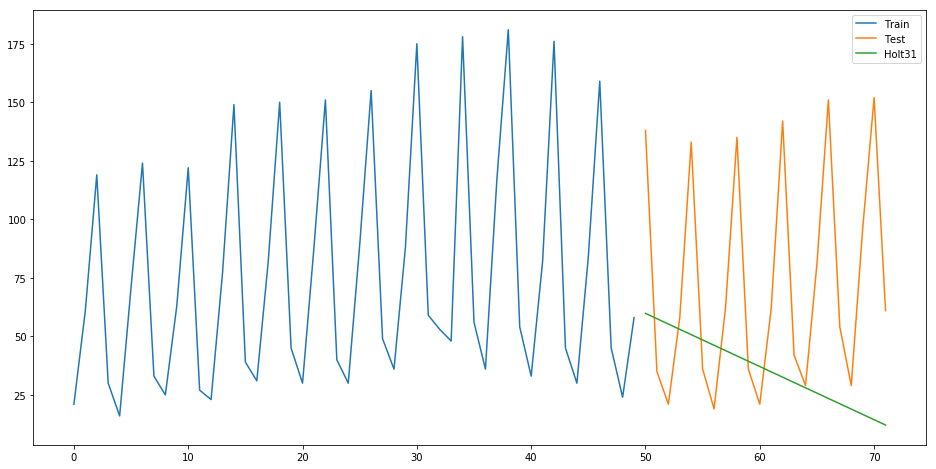

In [48]:
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(fcst_Holt['Holt31'], label='Holt31')
plt.legend(loc='best')

In [50]:
mean_absolute_percentage_error(test['Pax'],fcst_Holt['Holt31'])

62.29250663900409

In [51]:
rmse = sqrt(mean_squared_error(test['Pax'],fcst_Holt['Holt31']))
rmse

62.43852636237127

In [52]:
#fitting the optimummodel
modelopt_fit = modelh.fit()

In [53]:
#forecasing the optimum model
fcst_Holt['Opt'] = modelopt_fit.forecast(len(test['Pax']))

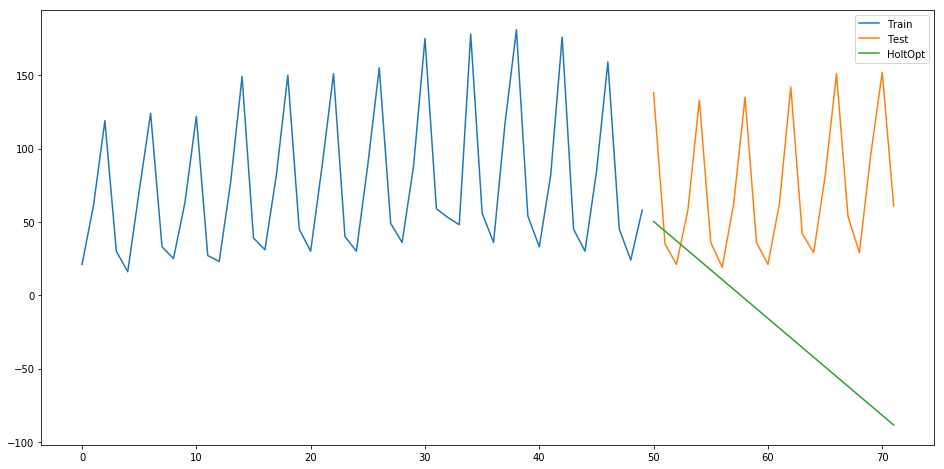

In [54]:
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(fcst_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')

In [55]:
modelopt_fit.model.params#alpha=0.315 and beta=0.315

{'smoothing_level': 0.3157894736842105,
 'smoothing_slope': 0.3157894736842105,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 21.0,
 'initial_slope': 40.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
mean_absolute_percentage_error(test['Pax'],fcst_Holt['Opt'])

136.33863507142533

In [57]:
rmse = sqrt(mean_squared_error(test['Pax'],fcst_Holt['Opt']))
rmse

113.43885733619939

# holt winter model

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [59]:
model1_fit=ExponentialSmoothing(np.asarray(train['Pax']), seasonal_periods=4 ,seasonal='add').fit(optimized=True)

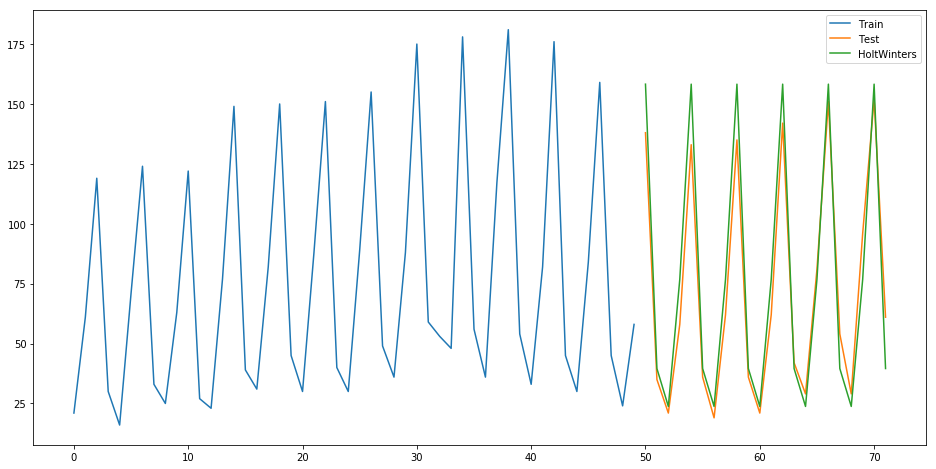

In [60]:
fcst_HoltW = test.copy()
fcst_HoltW['HoltW'] = model1_fit.forecast(len(test['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(fcst_HoltW['HoltW'], label='HoltWinters')
plt.legend(loc='best')

In [61]:
#the holt winters is having seasonality along with the trend as usgdp has only trend

In [62]:
model1_fit.model.params
#'smoothing_level': 0.19530035845102958,--aplha
 #'smoothing_slope': 0.0,--beta
 #'smoothing_seasonal': 0.2511298406717097--gamma

{'smoothing_level': 0.19530035845102958,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': 0.2511298406717097,
 'damping_slope': nan,
 'initial_level': 30.795483827791653,
 'initial_slope': nan,
 'initial_seasons': array([-13.2990452 ,  33.92434184,  96.08879349,  -4.15004564]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
mean_absolute_percentage_error(test['Pax'],fcst_HoltW['HoltW'])

16.575546629594186

# holt winter model with the trend and seasonality

In [64]:
model2opt_fit = ExponentialSmoothing(np.asarray(train['Pax']),  seasonal_periods=4, trend='add',seasonal='add').fit(optimized=True)

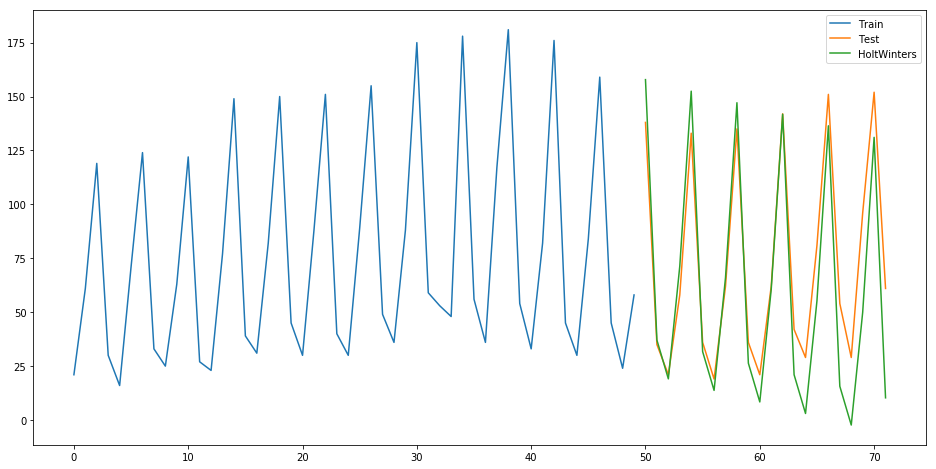

In [65]:
fcst_HoltW = test.copy()
fcst_HoltW['HoltW'] = model2opt_fit.forecast(len(test['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(fcst_HoltW['HoltW'], label='HoltWinters')
plt.legend(loc='best')

In [66]:
mean_absolute_percentage_error(test['Pax'],fcst_HoltW['HoltW'])

32.54972488824288

# holt winter model with trend,seasona;ity and paramters

In [67]:
model3_fit = ExponentialSmoothing(np.asarray(train['Pax']),  seasonal_periods=4,seasonal='add').fit(smoothing_slope = 0.2, smoothing_seasonal=0.1, smoothing_level = 0.2, optimized=True)

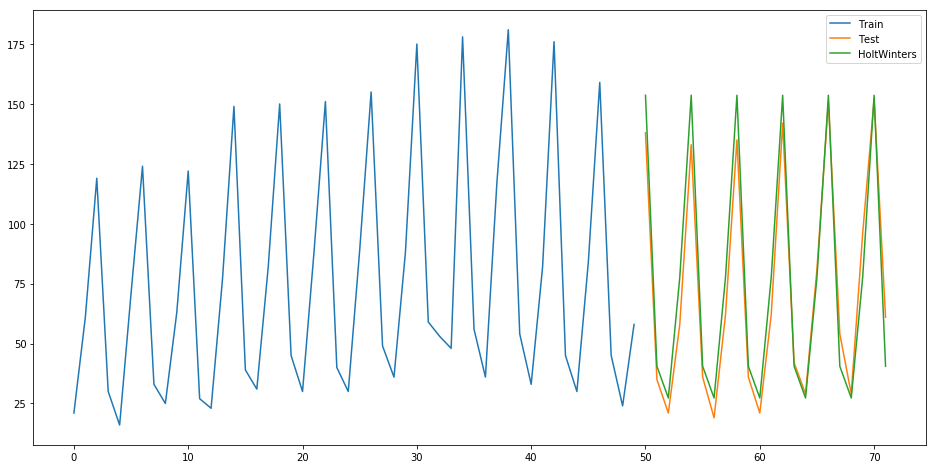

In [68]:
fcst_HoltW = test.copy()
fcst_HoltW['HoltW1'] = model3_fit.forecast(len(test['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(fcst_HoltW['HoltW1'], label='HoltWinters')
plt.legend(loc='best')

In [69]:
mean_absolute_percentage_error(test['Pax'],fcst_HoltW['HoltW1'])

17.15914626831889

# forecasting for next two years

In [70]:
PORT.tail()

,Year,Quarter,Pax,TimeIndex
67,2016,Q4,54,2016-12-31
68,2017,Q1,29,2017-03-31
69,2017,Q2,96,2017-06-30
70,2017,Q3,152,2017-09-30
71,2017,Q4,61,2017-12-31


In [71]:
model3_fit = ExponentialSmoothing(np.asarray(train['Pax']),  seasonal_periods=4,seasonal='add').fit(smoothing_slope = 0.2, smoothing_seasonal=0.1, smoothing_level = 0.2, optimized=True)

In [72]:
fcst_HoltW=model3_fit.forecast(9).astype('int')

In [73]:
fcst_HoltW.shape

(9,)

In [74]:
forecast = pd.DataFrame(columns=('Year','Quarter' ,'Pax', 'timeindex'))

In [75]:
forecast

,Year,Quarter,Pax,timeindex


In [76]:
forecast['Year']=['2018','2018','2018','2018','2018','2018','2018']
forecast['Quarter']=['Q1','Q2','Q3','Q4','Q1','Q2','Q3']

forecast['Pax']=[fcst_HoltW[0],fcst_HoltW[1],fcst_HoltW[2],fcst_HoltW[3],fcst_HoltW[4],fcst_HoltW[5],
                   fcst_HoltW[6]
                   ]

date_rng=pd.date_range(start='1/1/2018',end='31/12/2019',freq='Q')
forecast['timeindex']=pd.DataFrame(date_rng4, columns=['Month'])

In [77]:
forecast

,Year,Quarter,Pax,timeindex
0,2018,Q1,153,2000-03-31
1,2018,Q2,40,2000-06-30
2,2018,Q3,27,2000-09-30
3,2018,Q4,77,2000-12-31
4,2018,Q1,153,2001-03-31
5,2018,Q2,40,2001-06-30
6,2018,Q3,27,2001-09-30


In [78]:
forecast.index=[72,73,74,75,76,77,78]

In [79]:
forecast

,Year,Quarter,Pax,timeindex
72,2018,Q1,153,2000-03-31
73,2018,Q2,40,2000-06-30
74,2018,Q3,27,2000-09-30
75,2018,Q4,77,2000-12-31
76,2018,Q1,153,2001-03-31
77,2018,Q2,40,2001-06-30
78,2018,Q3,27,2001-09-30


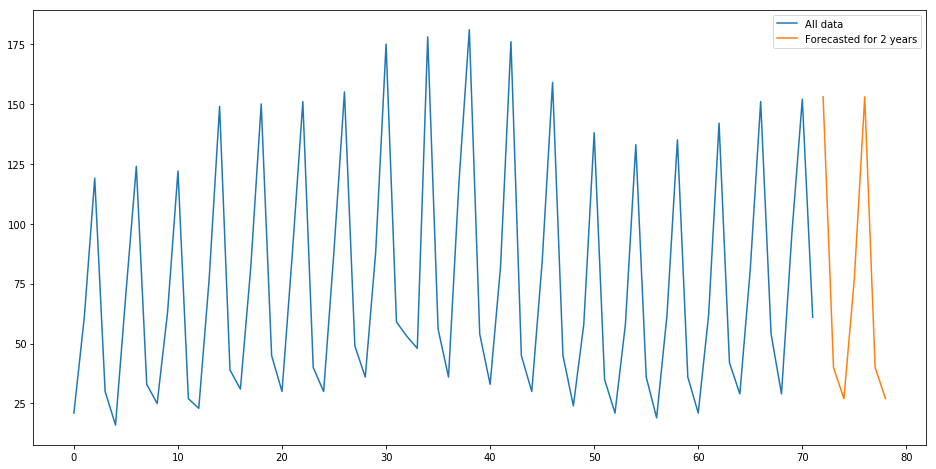

In [80]:
plt.figure(figsize=(16,8))
plt.plot(PORT['Pax'], label='All data')
plt.plot(forecast['Pax'], label='Forecasted for 2 years')
plt.legend(loc='best')